# Solucion a la evidencia

Cargar y lectura datos del archivo A01743270_X.csv

In [ ]:
#Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

RunInColab = True

if RunInColab:
    from google.colab import drive
    drive.mount('/content/drive')
    Ruta = "/content/drive/My Drive/Colab Notebooks/"
else:
    Ruta = "C:/Users/Pity/Documents/GitHub/TC1002S/NotebooksStudents/A01743270/"

# Carga de los archivos
url = Ruta + "A01743270_X.csv"
df = pd.read_csv(url)

# Muestra de las primeras filas del archivo
print("Muestras de las primas filas del archivo")
print(df.head())

# Informacion general del DataFrame
print("\nInformacion del DataFrame")
print(df.info())

# Visualizacion de los datos
print("\nVisualizacion de los datos")
print(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Muestras de las primas filas del archivo
   Unnamed: 0        x1         x2         x3        x4        x5        x6  \
0           0  6.780960 -10.604664  -7.285837 -2.224812  5.775958  4.213894   
1           1 -8.388052   9.581872   0.478063  6.426829  0.846696  4.936898   
2           2  6.088367  -5.543544 -10.428694 -0.875855  4.387713  3.923496   
3           3  7.611012   0.999403   0.991107 -9.341943  8.336612  7.942609   
4           4  6.878363   4.178729   2.697602 -8.131464  9.407220  2.642533   

         x7        x8        x9       x10       x11       x12  
0  6.111239  9.619803  5.861835 -0.279134  6.080847  8.134552  
1 -2.981230 -0.164544  9.678803 -1.821927 -9.955958 -0.164687  
2  5.137290  9.591340  6.022604 -3.847497  9.291256  4.209171  
3 -0.420246 -9.483317  7.677227  0.233392 -9.408906  0.948738  
4  1.495706 -6.542283  6.676757  5.

Histograma de los datos

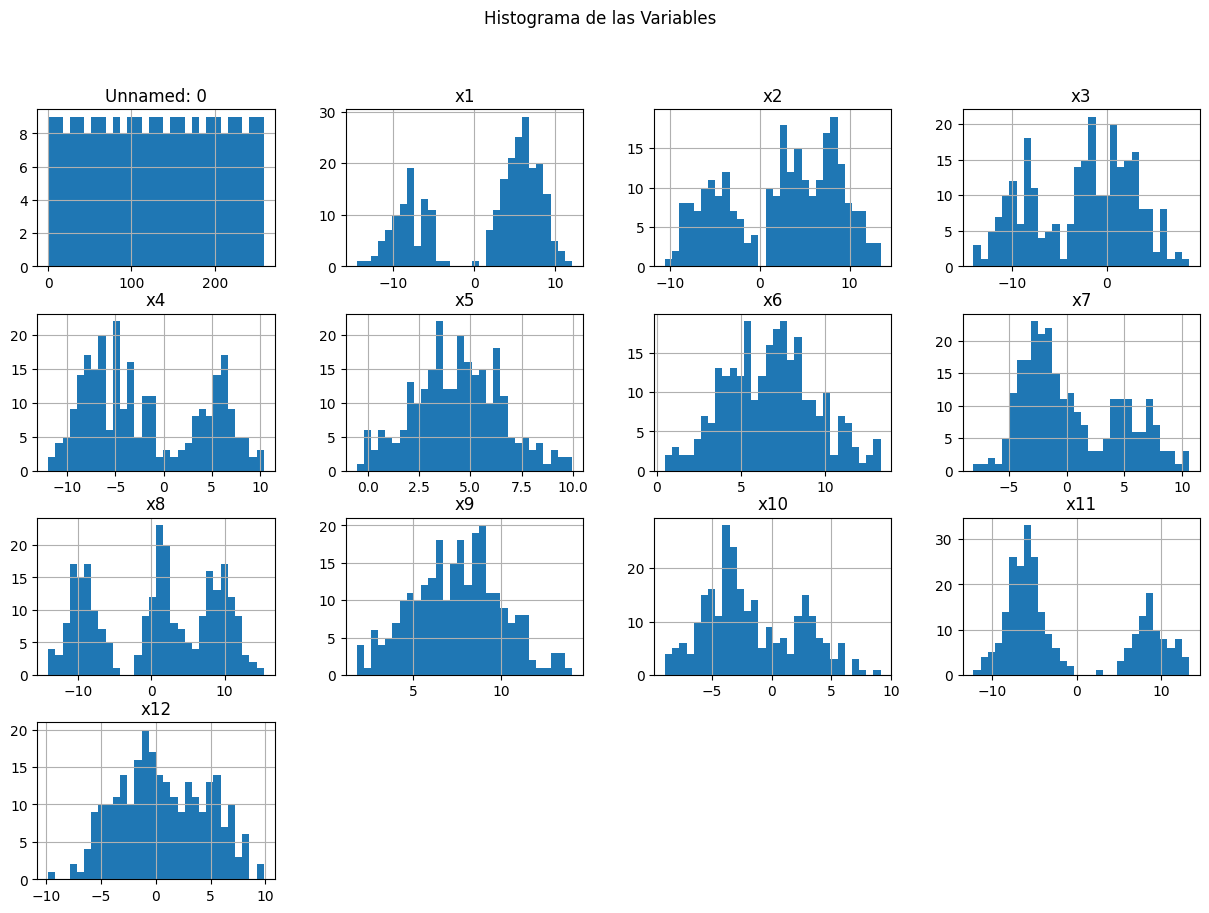

In [ ]:
# Histograma de las variables
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograma de las Variables')
plt.show()

Grafico de correlacion

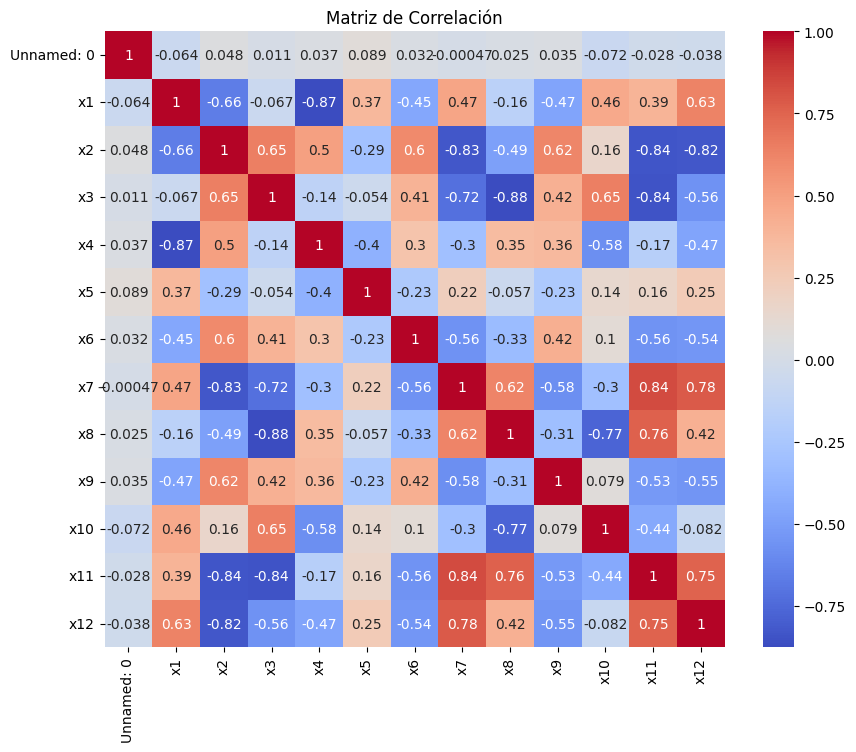

In [ ]:
# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Estandarizacion de los datos

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Calculo del SSE

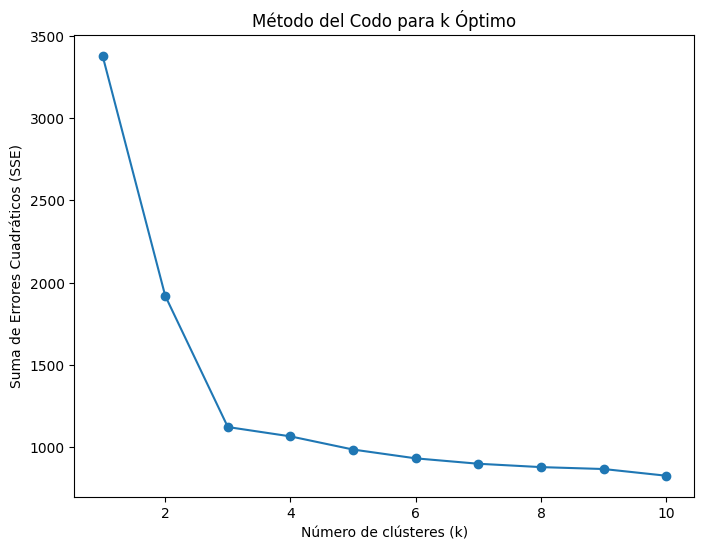

In [ ]:
# Calcular SSE para diferentes valores de k
sse_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse_values.append(kmeans.inertia_)

# Graficar SSE vs. k
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de Errores Cuadráticos (SSE)')
plt.title('Método del Codo para k Óptimo')
plt.show()

Visualizacion de los cluester

In [ ]:
# Elegir el número óptimo de clústeres
optimal_k = 3  # Ajusta según el gráfico del codo
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(df_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('Visualización de Clústeres')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Conlcusion

In [ ]:
# Conclusión
print(f"\nEl número óptimo de clústeres seleccionado es: {optimal_k}")


El número óptimo de clústeres seleccionado es: 3
